In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
df = pd.read_csv("data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [9]:
# Convert the 'Outcome' column to categorical
df['Outcome'] = df['Outcome'].astype('category')

In [16]:
# Handle zero values in the numerical fields that logically cannot be zero

nonZeroColumns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[nonZeroColumns] = df[nonZeroColumns].replace(0, np.nan)

# Fill with the median value
df.fillna(df.median(numeric_only=True), inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


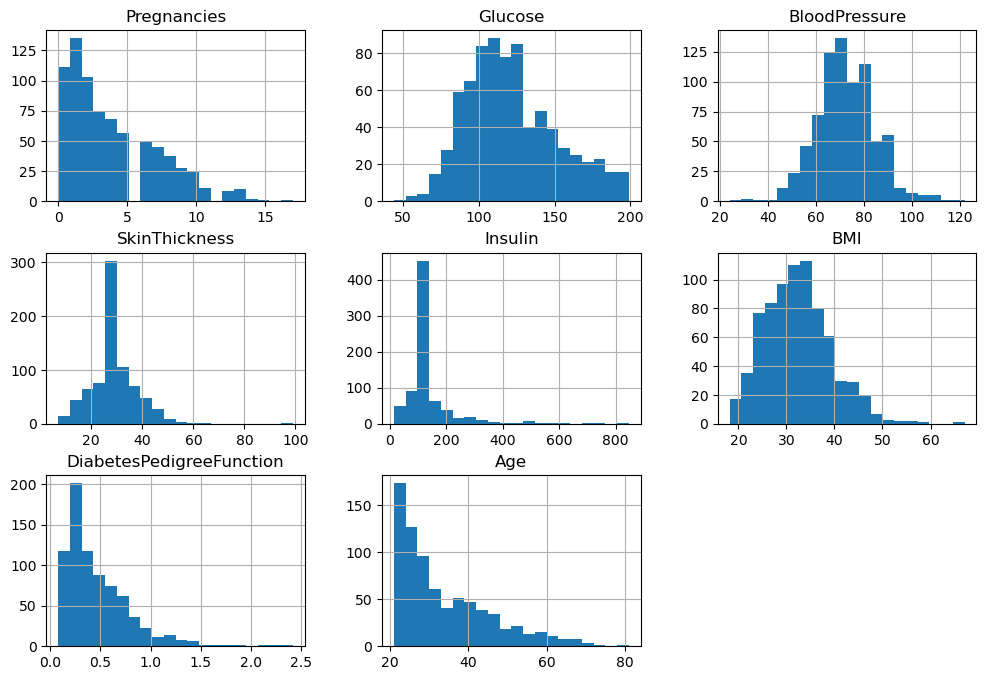

In [18]:
# Histogram

df.hist(figsize=(12,8), bins=20)  # Histogram
plt.show()

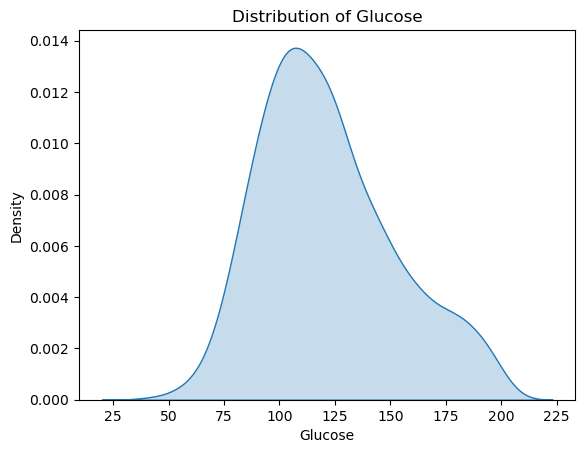

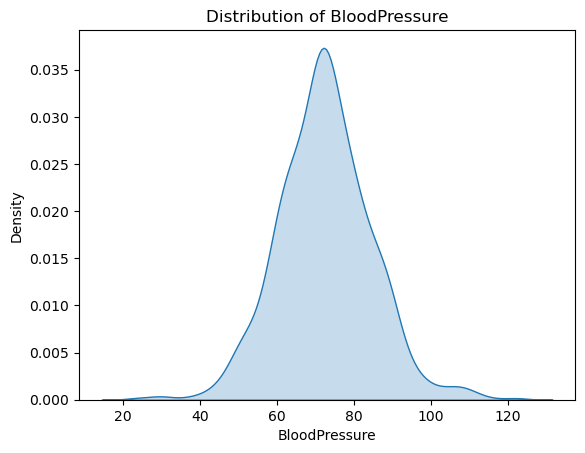

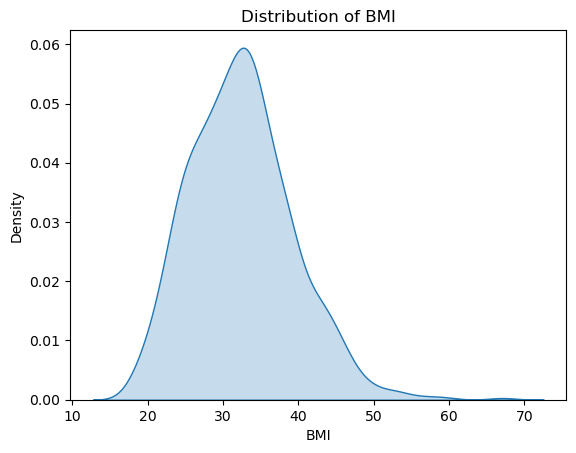

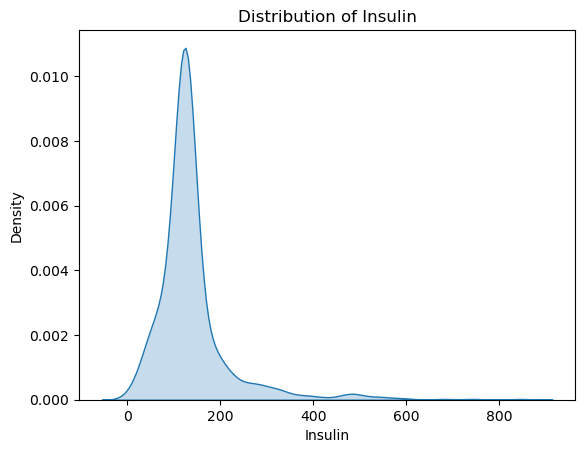

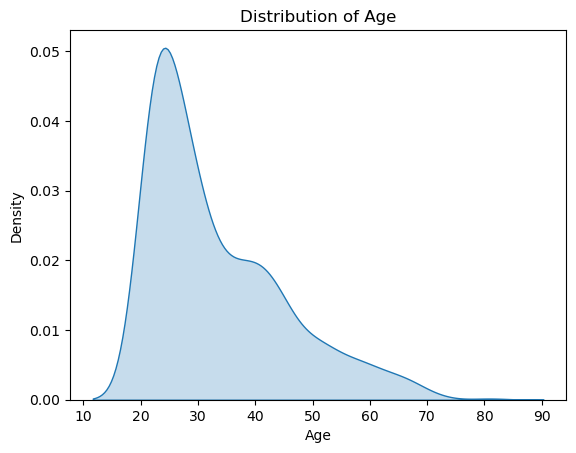

In [19]:
# OR KDE (density) plots
for col in ['Glucose', 'BloodPressure', 'BMI', 'Insulin', 'Age']:
    sns.kdeplot(df[col], fill=True)
    plt.title(f'Distribution of {col}')
    plt.show()

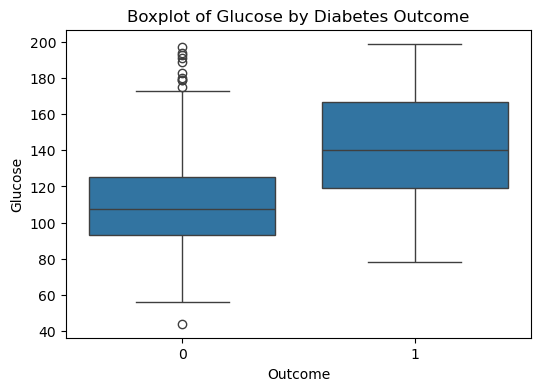

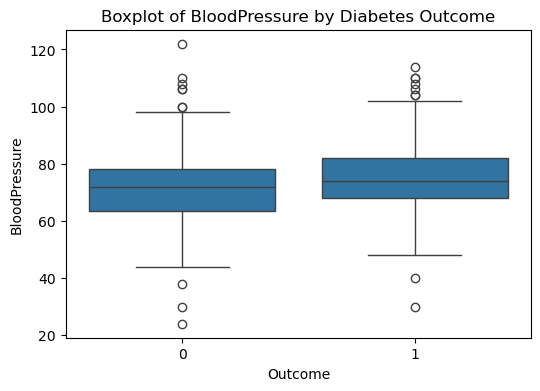

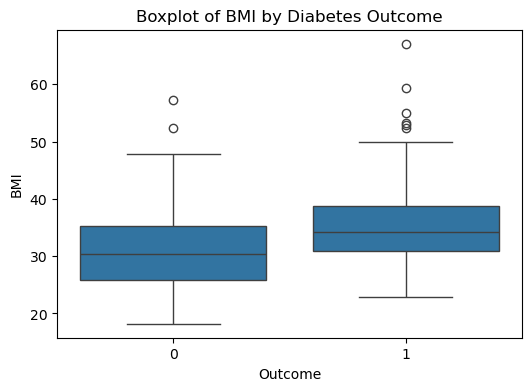

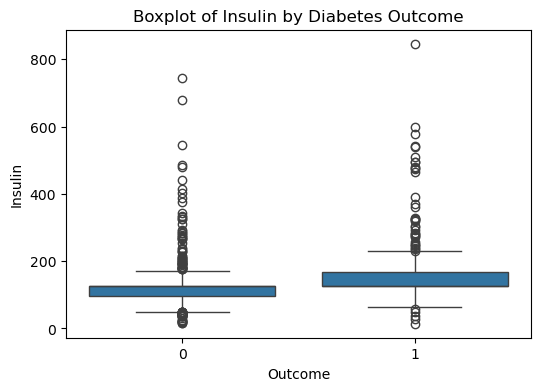

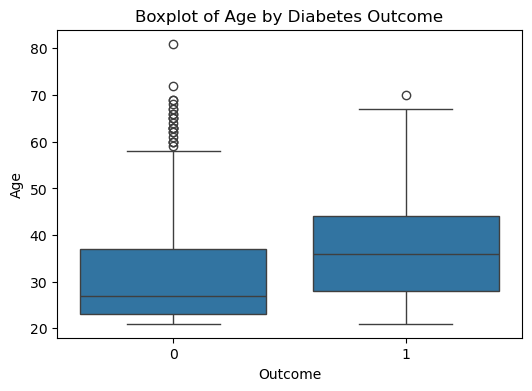

In [21]:
# Box Plots for outlieres

for col in ['Glucose', 'BloodPressure', 'BMI', 'Insulin', 'Age']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Outcome", y=col, data=df)
    plt.title(f"Boxplot of {col} by Diabetes Outcome")
    plt.show()

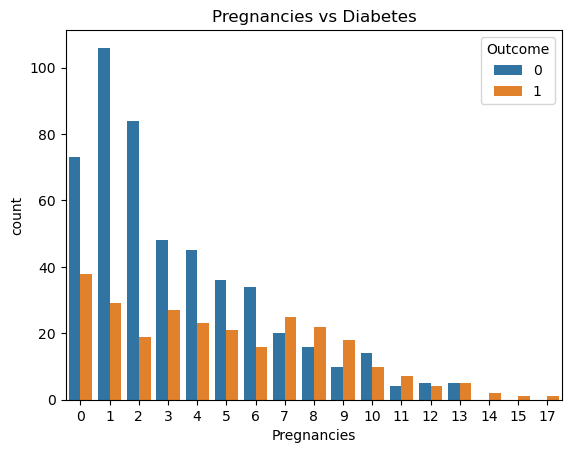

In [22]:
# Bar Plot for Pregnancies

sns.countplot(x="Pregnancies", hue="Outcome", data=df)
plt.title("Pregnancies vs Diabetes")
plt.show()

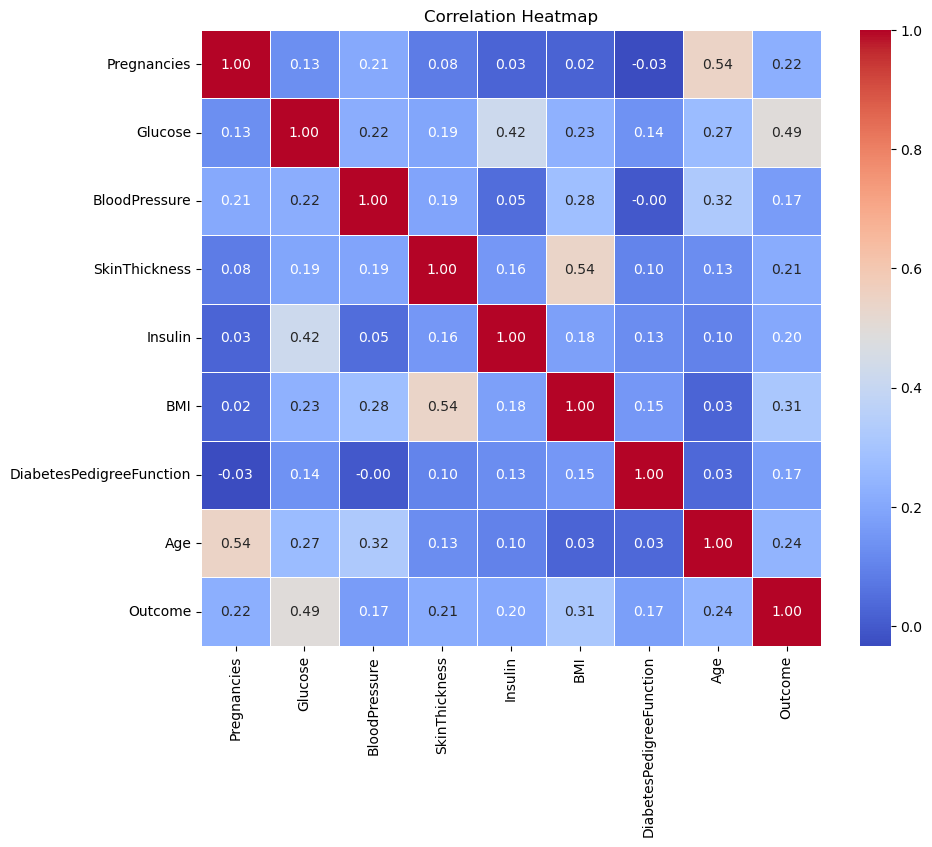

In [23]:
# Histogram

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [25]:
# Remove outliers for Age, Insulin and BMI

df = df[(df['Age'] <= df['Age'].quantile(0.95))]  # Remove extreme Age
df = df[(df['Insulin'] <= df['Insulin'].quantile(0.95))]  # Remove extreme Insulin
df = df[(df['BMI'] <= df['BMI'].quantile(0.95))]  # Remove extreme BMI

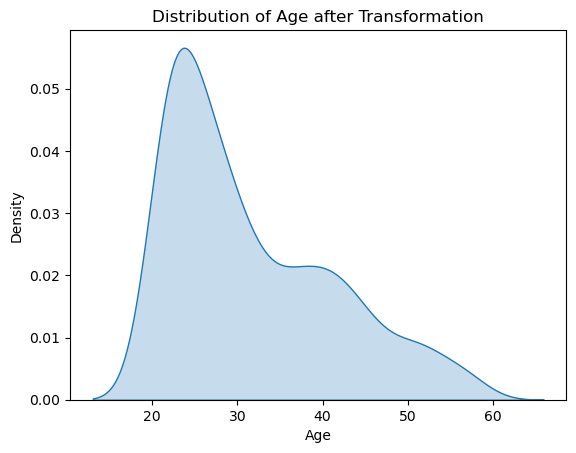

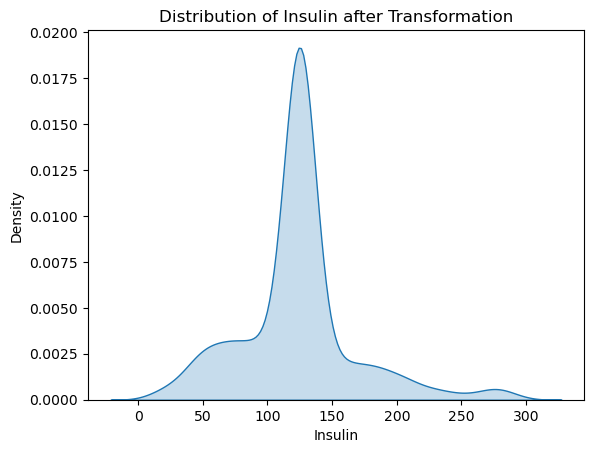

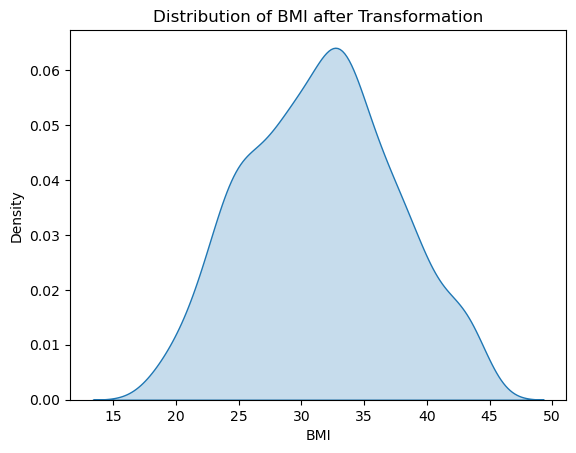

In [30]:
# Check distribution again after transformation
for col in ['Age', 'Insulin', 'BMI']:
    sns.kdeplot(df[col], fill=True)
    plt.title(f'Distribution of {col} after Transformation')
    plt.show()

In [32]:
# Normalize the data using standard scaler
scaler = StandardScaler()
featuresToScale = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[featuresToScale] = scaler.fit_transform(df[featuresToScale])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,1.034229,0.033360,0.833277,0.029694,0.345202,0.515102,1.889318,1
1,1,-1.149435,-0.479447,0.085590,0.029694,-0.845443,-0.356852,-0.066658,0
2,8,2.247376,-0.650382,0.085590,0.029694,-1.406747,0.657268,0.036288,1
3,1,-1.010790,-0.479447,-0.662097,-0.669682,-0.590305,-0.938155,-1.096119,0
4,0,0.652955,-2.701607,0.833277,0.999796,1.961078,5.762622,0.139234,1


In [34]:
df['Outcome'].value_counts(normalize=True)

Outcome
0    0.674735
1    0.325265
Name: proportion, dtype: float64

In [37]:
df.nunique()

Pregnancies                  17
Glucose                     131
BloodPressure                44
SkinThickness                45
Insulin                     146
BMI                         213
DiabetesPedigreeFunction    464
Age                          38
Outcome                       2
dtype: int64

In [39]:
# 

In [41]:
X = df.drop('Outcome', axis=1)
Y = df['Outcome']

X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,1.034229,0.033360,0.833277,0.029694,0.345202,0.515102,1.889318
1,1,-1.149435,-0.479447,0.085590,0.029694,-0.845443,-0.356852,-0.066658
2,8,2.247376,-0.650382,0.085590,0.029694,-1.406747,0.657268,0.036288
3,1,-1.010790,-0.479447,-0.662097,-0.669682,-0.590305,-0.938155,-1.096119
4,0,0.652955,-2.701607,0.833277,0.999796,1.961078,5.762622,0.139234


In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(462, 8) (199, 8)
(462,) (199,)


In [45]:
# Train Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)

# Evaluate performance
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2%}")

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       143
           1       0.60      0.62      0.61        56

    accuracy                           0.78       199
   macro avg       0.73      0.73      0.73       199
weighted avg       0.78      0.78      0.78       199

[[120  23]
 [ 21  35]]
Accuracy: 77.89%


Model Performance is not good as it is just 77.89%
I will retrain using after balancing the weights of the outcomes, as it stands now; ~65% is 0/False, while ~35% is 1/True

In [48]:
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

# Evaluate performance
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2%}")

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       143
           1       0.59      0.77      0.67        56

    accuracy                           0.78       199
   macro avg       0.74      0.78      0.75       199
weighted avg       0.81      0.78      0.79       199

[[113  30]
 [ 13  43]]
Accuracy: 78.39%


Overall accuracy increases to ~78.3%. So does all of the other metrics.

In [64]:
# SVM Model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


svm_model = SVC(kernel='linear', random_state=42)  # Linear kernel
svm_model.fit(X_train, Y_train)

Y_pred = svm_model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Confusion Matrix
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred))

# Classification Report
print('Classification Report:\n', classification_report(Y_test, Y_pred))

Accuracy: 79.90%
Confusion Matrix:
 [[124  19]
 [ 21  35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       143
           1       0.65      0.62      0.64        56

    accuracy                           0.80       199
   macro avg       0.75      0.75      0.75       199
weighted avg       0.80      0.80      0.80       199

